# Week 5 B
### Name: Jay Zhang

To solve the question: "What's the relationship between the CDH1 gene and Stomach Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Stomach_Cancer_(STAD)/TCGA.STAD.sampleMap_STAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Stomach_Cancer_(STAD)/TCGA.STAD.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,...,_GENOMIC_ID_TCGA_STAD_exp_HiSeq_exon,_GENOMIC_ID_TCGA_STAD_exp_GA,_GENOMIC_ID_TCGA_STAD_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_STAD_mutation_broad_gene,_GENOMIC_ID_TCGA_STAD_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/STAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_STAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_STAD_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_STAD_exp_HiSeq,_GENOMIC_ID_TCGA_STAD_miRNA_GA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,MSS,TCGA-3M-AB46-01,TCGA-3M-AB46,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-3M-AB46-01A-11R-A414-31,NaN,ffa0dfbd-83fa-4e47-b448-a7d922ca4e4a,NaN,TCGA-3M-AB46-01,TCGA-3M-AB46-01,ffa0dfbd-83fa-4e47-b448-a7d922ca4e4a,NaN,TCGA-3M-AB46-01A-11R-A414-31,NaN
TCGA-3M-AB47-01,MSI-L,TCGA-3M-AB47-01,TCGA-3M-AB47,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NO,NO,NO,NaN,...,TCGA-3M-AB47-01A-22R-A414-31,NaN,8ed72b3f-bec0-400b-a391-7763d5bccd57,NaN,TCGA-3M-AB47-01,TCGA-3M-AB47-01,8ed72b3f-bec0-400b-a391-7763d5bccd57,NaN,TCGA-3M-AB47-01A-22R-A414-31,NaN
TCGA-B7-5816-01,MSI-H,TCGA-B7-5816-01,TCGA-B7-5816,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-B7-5816-01A-21R-1602-13,NaN,cc969bc1-8daa-4b05-b15b-822c41343ebc,NaN,TCGA-B7-5816-01,TCGA-B7-5816-01,cc969bc1-8daa-4b05-b15b-822c41343ebc,NaN,TCGA-B7-5816-01A-21R-1602-13,NaN
TCGA-B7-5818-01,MSI-L,TCGA-B7-5818-01,TCGA-B7-5818,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-B7-5818-01A-11R-1602-13,NaN,8d4db1f2-5af0-4192-8f63-a36c98f5cf2b,NaN,TCGA-B7-5818-01,TCGA-B7-5818-01,8d4db1f2-5af0-4192-8f63-a36c98f5cf2b,NaN,TCGA-B7-5818-01A-11R-1602-13,NaN
TCGA-B7-A5TI-01,MSI-H,TCGA-B7-A5TI-01,TCGA-B7-A5TI,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-B7-A5TI-01A-11R-A31P-31,NaN,fba4eaa9-3fb9-4673-a71a-1a1440afbc15,TCGA-B7-A5TI-01A-11D-A31L-08,TCGA-B7-A5TI-01,TCGA-B7-A5TI-01,fba4eaa9-3fb9-4673-a71a-1a1440afbc15,TCGA-B7-A5TI-01A-11D-A31L-08,TCGA-B7-A5TI-01A-11R-A31P-31,NaN


In [3]:
# Display gene dataset
gene_data.head()

,TCGA-FP-A4BE-01,TCGA-BR-8081-01,TCGA-HU-A4GP-11,TCGA-IN-7806-01,TCGA-BR-4257-01,TCGA-RD-A8N6-01,TCGA-D7-8575-01,TCGA-VQ-A94P-01,TCGA-CD-A4MG-01,TCGA-IN-A6RO-01,...,TCGA-IN-AB1V-11,TCGA-D7-6522-01,TCGA-KB-A6F7-01,TCGA-BR-8690-01,TCGA-CG-5734-11,TCGA-CG-5730-11,TCGA-VQ-A8DV-01,TCGA-D7-6527-01,TCGA-BR-A4PD-01,TCGA-BR-8295-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.224808,0.614508,-0.051192,2.248808,-0.589492,1.744208,-0.217192,0.417608,0.905108,1.053308,...,1.374108,0.460408,-1.622792,0.287608,-0.413692,0.397508,-0.354192,-0.607492,-1.010092,-0.886392
HIF3A,-1.747726,-0.110026,6.499874,4.360074,-3.200826,6.345474,2.179874,4.146274,-0.331526,-1.225426,...,4.819474,0.926574,2.738074,2.096374,1.363174,0.988874,4.681074,-0.642026,-1.119126,4.094974
RNF17,-0.531035,-0.531035,0.273965,-0.531035,-0.531035,-0.531035,-0.037735,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,8.319665,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,8.553665
RNF10,-0.257772,0.026728,0.397228,0.252328,-0.484872,-0.058472,0.202628,0.389528,0.015228,-0.069372,...,0.694328,-0.146772,0.432328,0.061828,-0.045072,-0.067172,-0.255272,0.294828,0.080528,0.850728
RNF11,0.019122,-0.550378,1.116122,-0.463778,-0.431178,-0.000678,-0.074578,1.165622,-0.390978,-0.815278,...,1.132622,-0.537778,-0.078378,-0.151778,0.207622,0.418622,-0.204978,-0.691078,0.027222,-0.469978


In [4]:
# Set Basic info
gene_fullname = 'CDH1 gene'
gene = 'cdh1'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Stomach Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 107 features, and the gene dataset includes 20530 genes


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,MSS,TCGA-3M-AB46-01,TCGA-3M-AB46,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,0.213122,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512
TCGA-3M-AB47-01,MSI-L,TCGA-3M-AB47-01,TCGA-3M-AB47,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NO,NO,NO,NaN,...,-0.254978,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988
TCGA-B7-5816-01,MSI-H,TCGA-B7-5816-01,TCGA-B7-5816,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612
TCGA-B7-5818-01,MSI-L,TCGA-B7-5818-01,TCGA-B7-5818,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,0.818922,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312
TCGA-B7-A5TI-01,MSI-H,TCGA-B7-A5TI-01,TCGA-B7-A5TI,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0.0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,0.213122,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512
TCGA-3M-AB47-01,0.0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,-0.254978,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988
TCGA-B7-5816-01,-18698.0,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-0.748878,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612
TCGA-B7-5818-01,-22792.0,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,0.818922,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312
TCGA-B7-A5TI-01,-19014.0,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-0.748878,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812


In [7]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Stomach Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0.0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512,1
TCGA-3M-AB47-01,0.0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988,1
TCGA-B7-5816-01,-18698.0,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612,1
TCGA-B7-5818-01,-22792.0,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312,1
TCGA-B7-A5TI-01,-19014.0,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

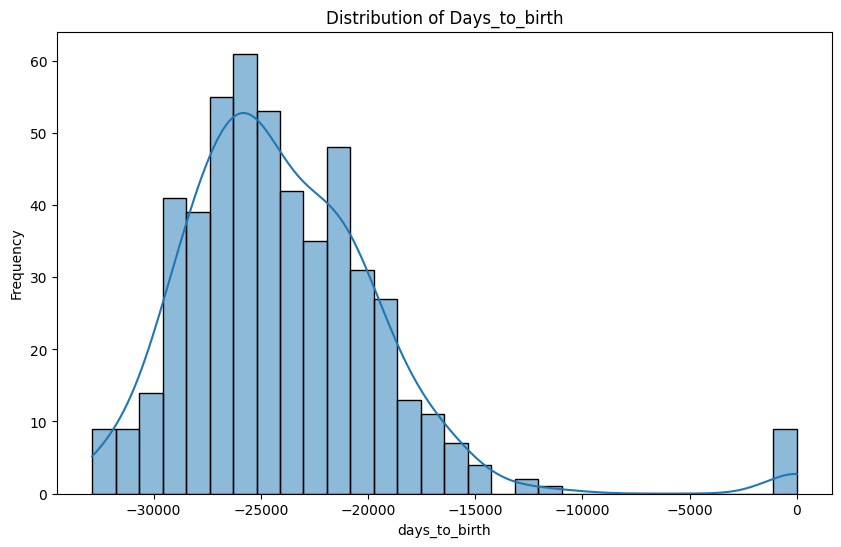

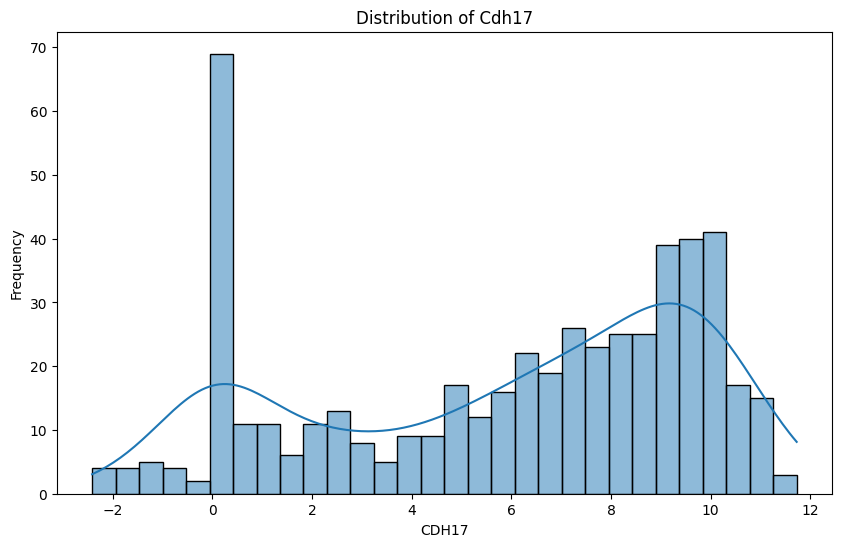

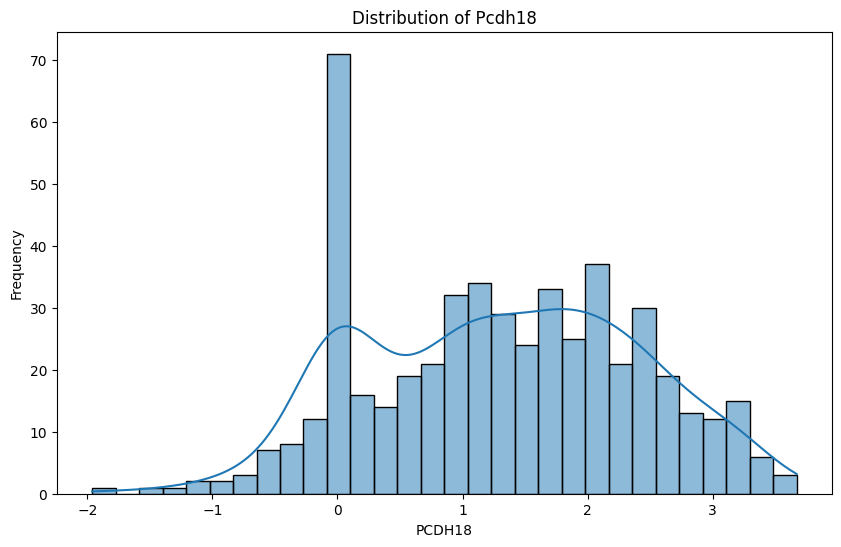

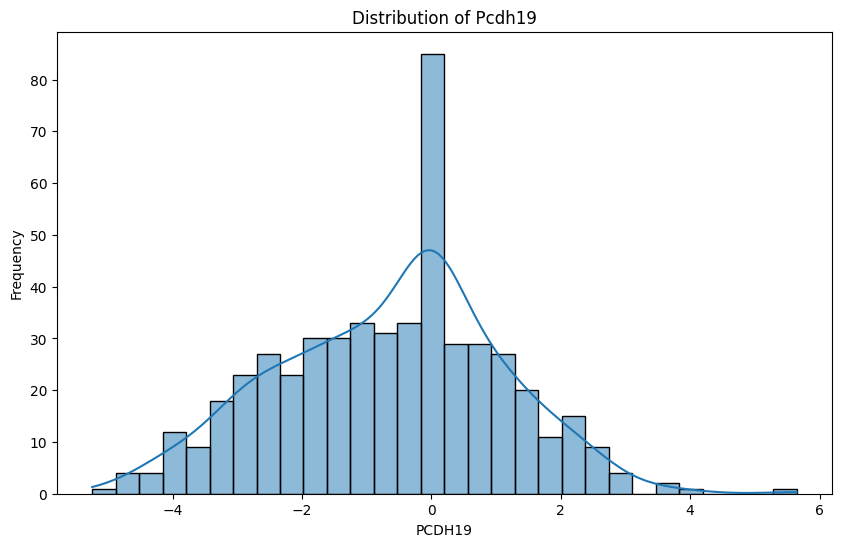

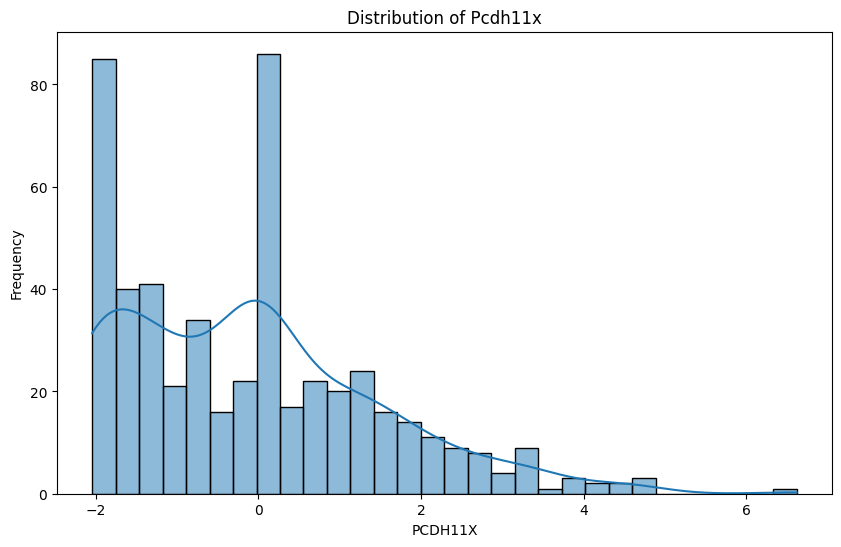

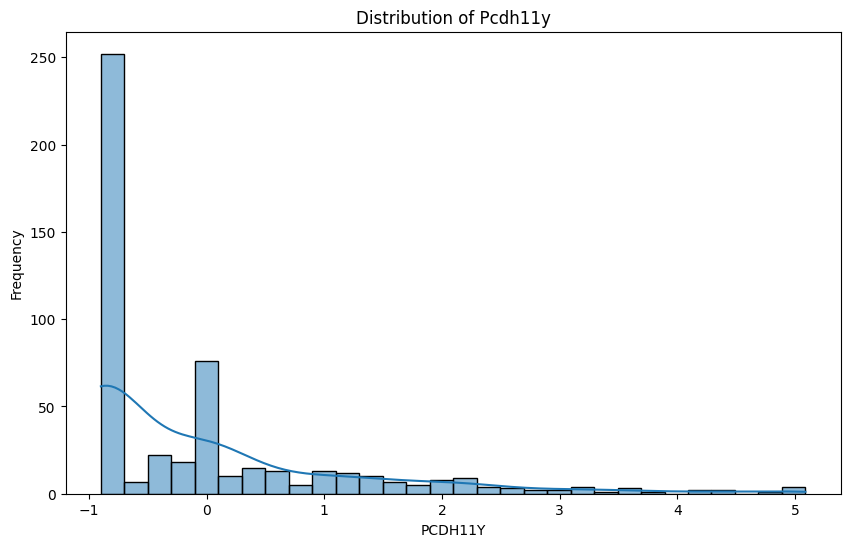

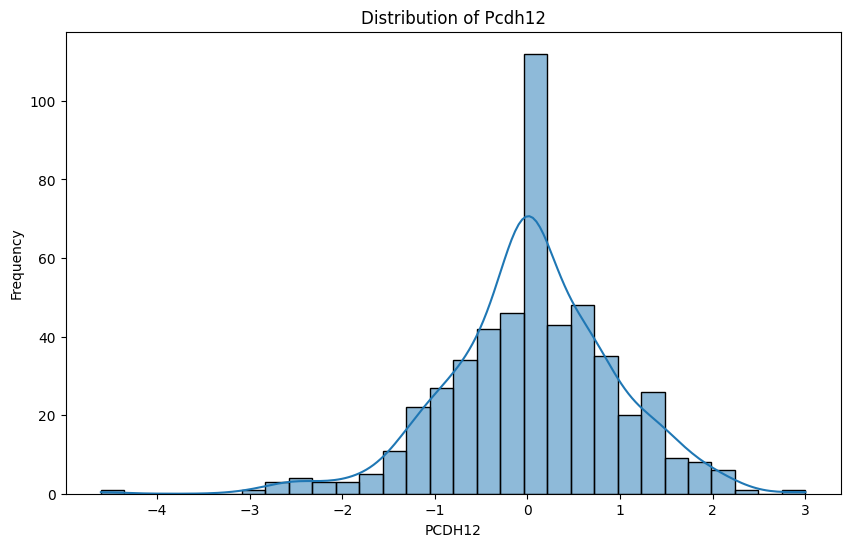

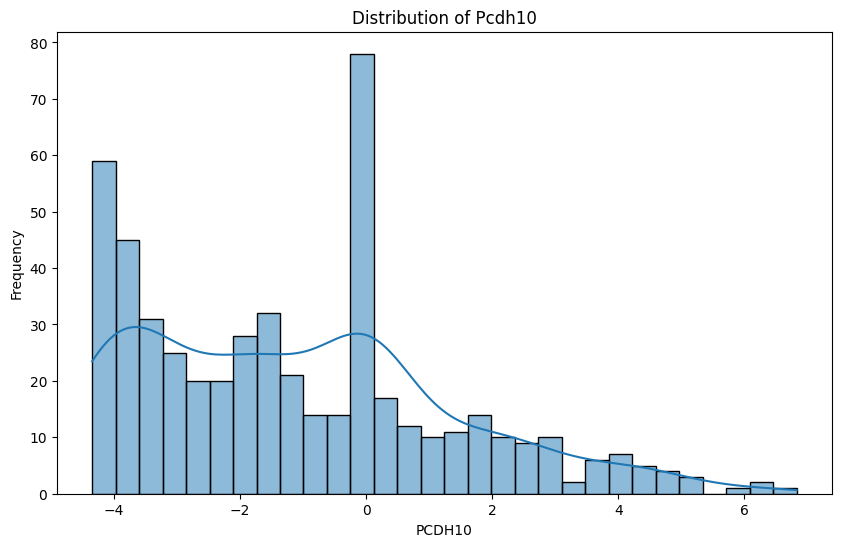

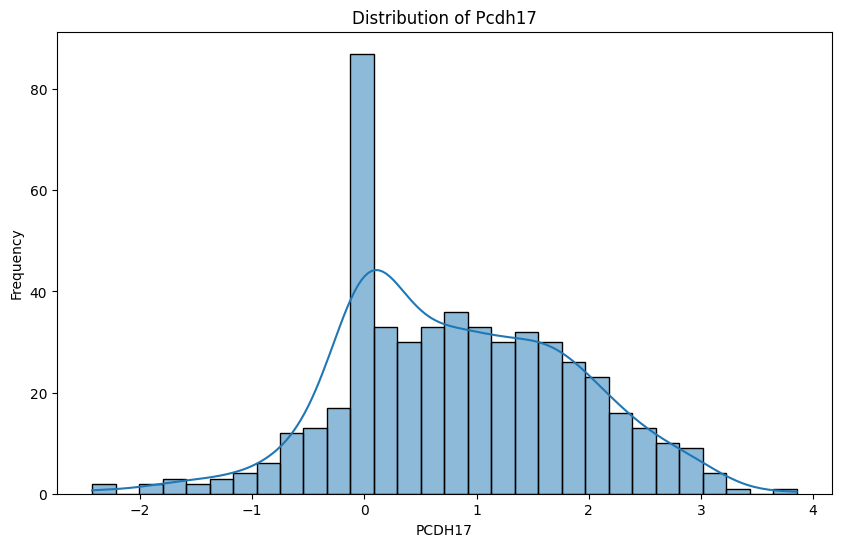

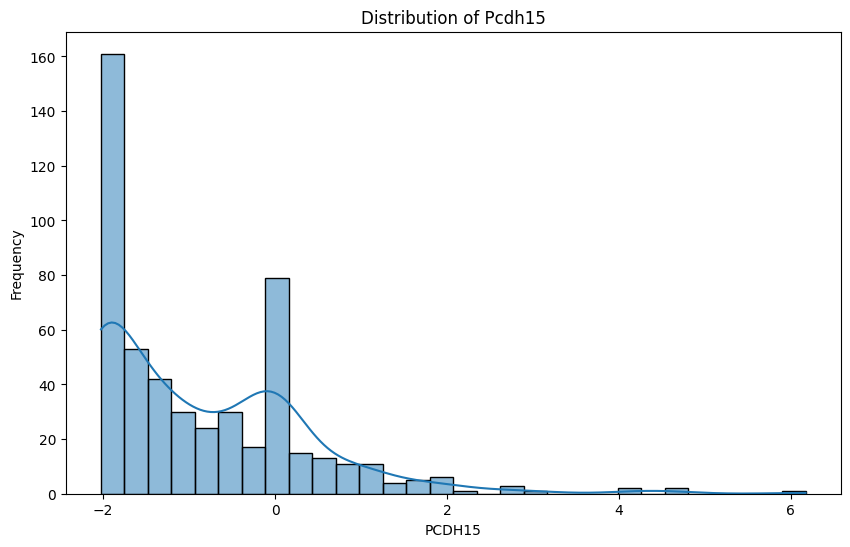

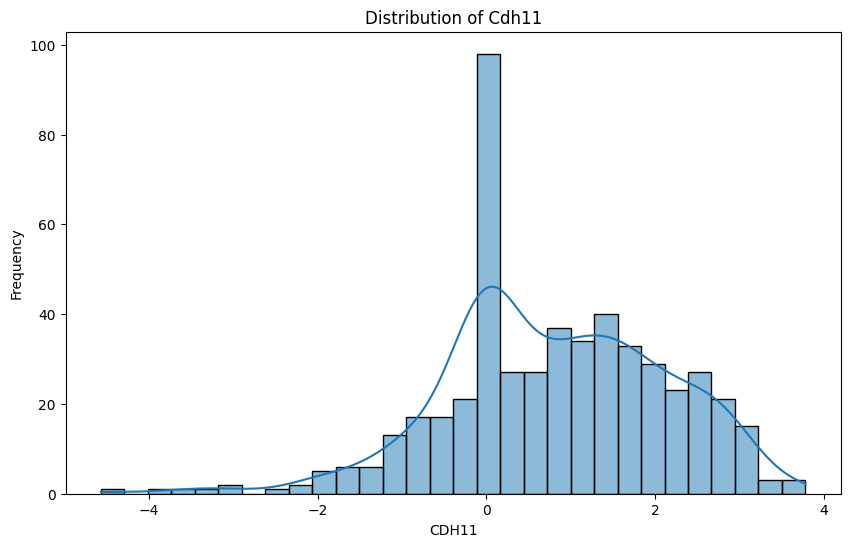

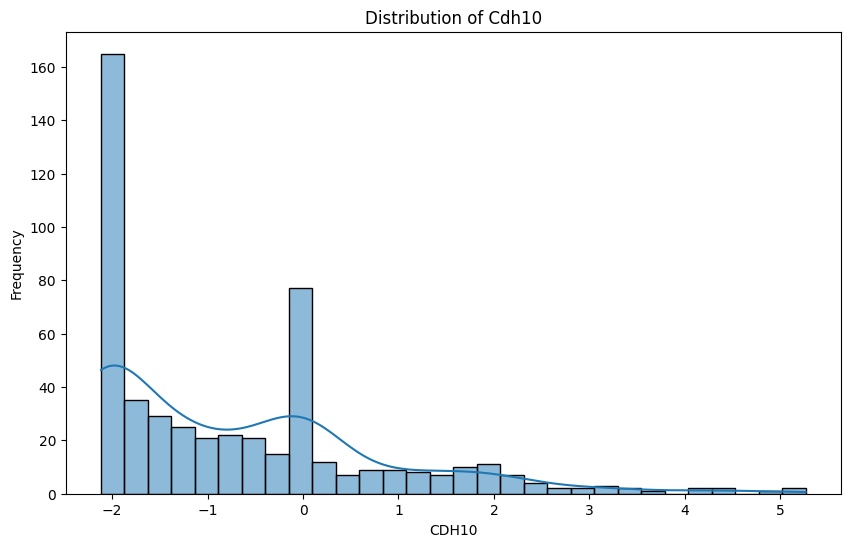

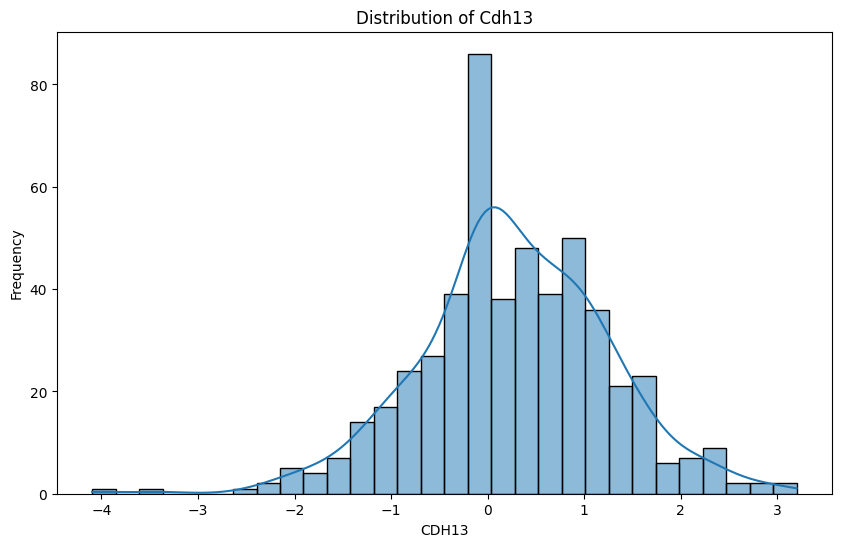

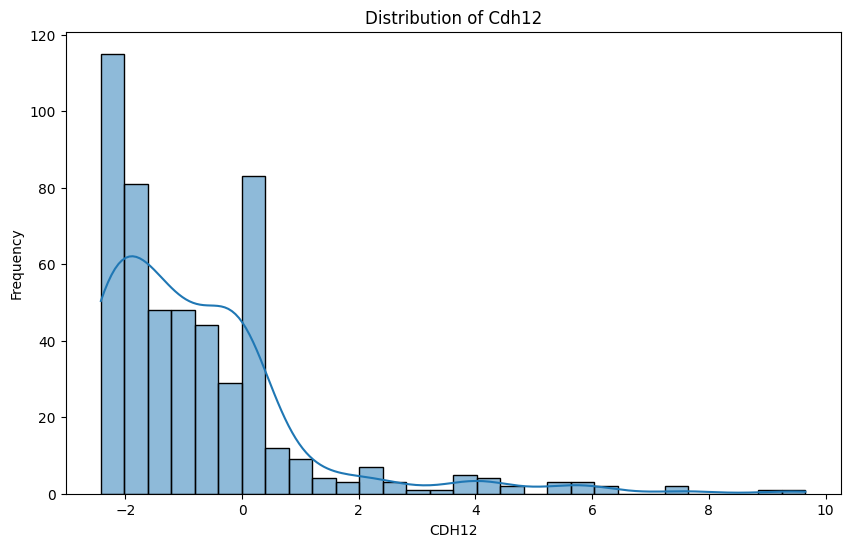

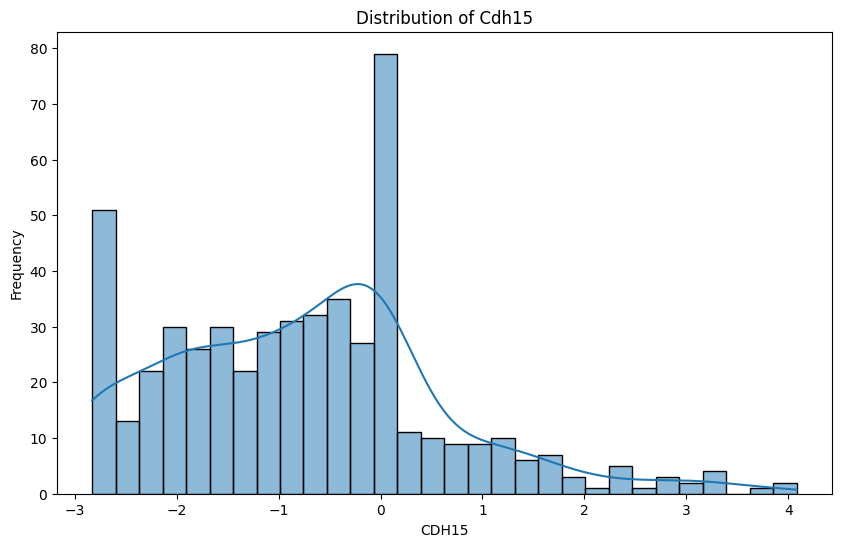

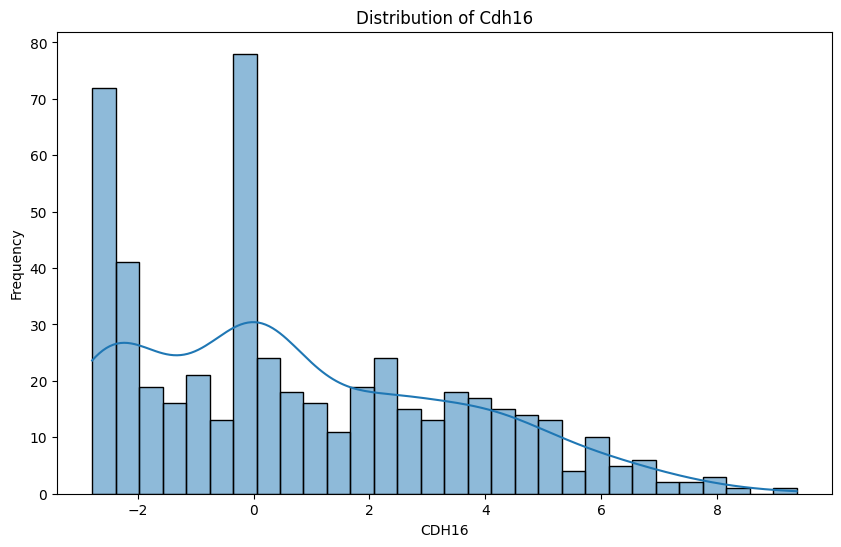

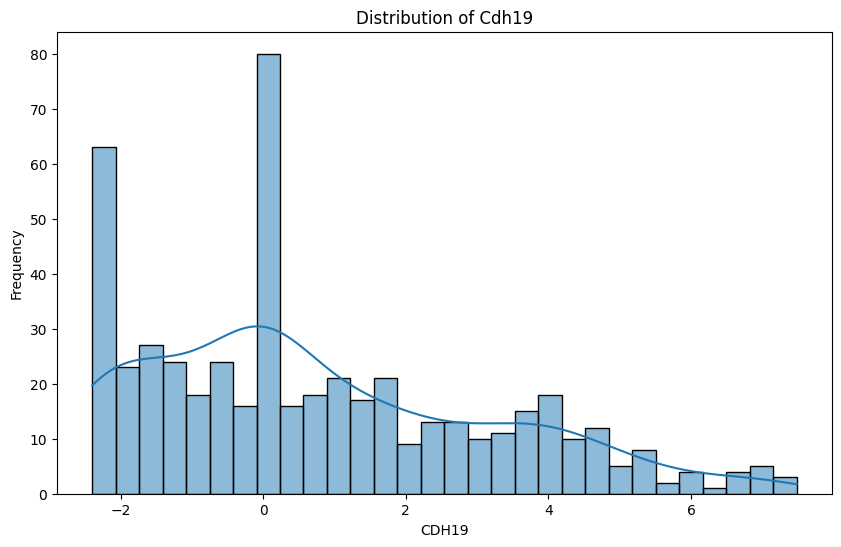

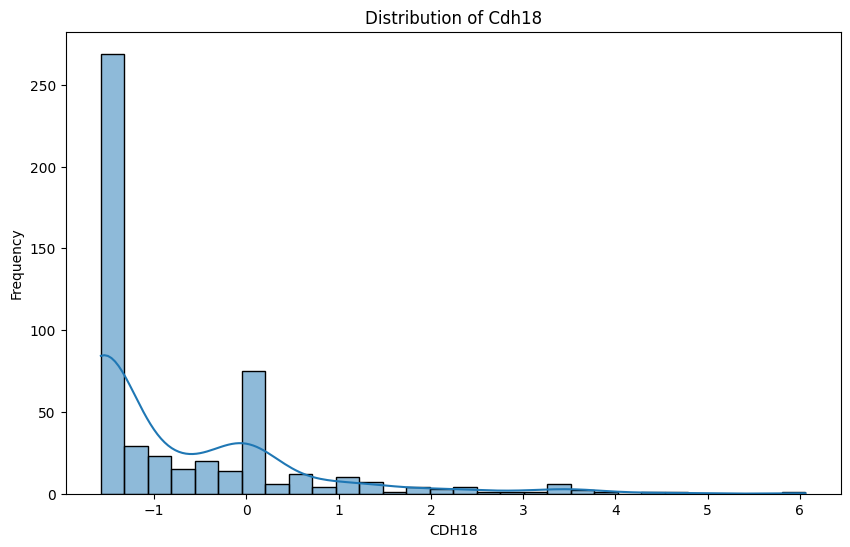

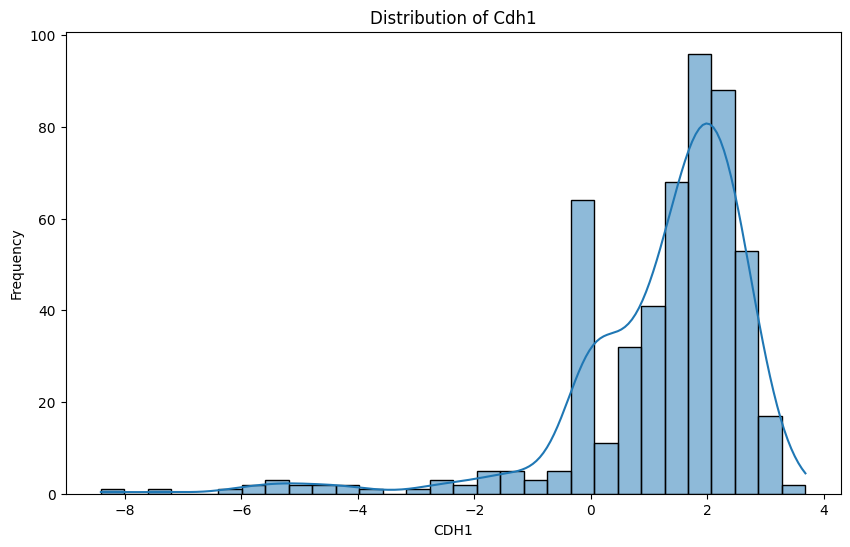

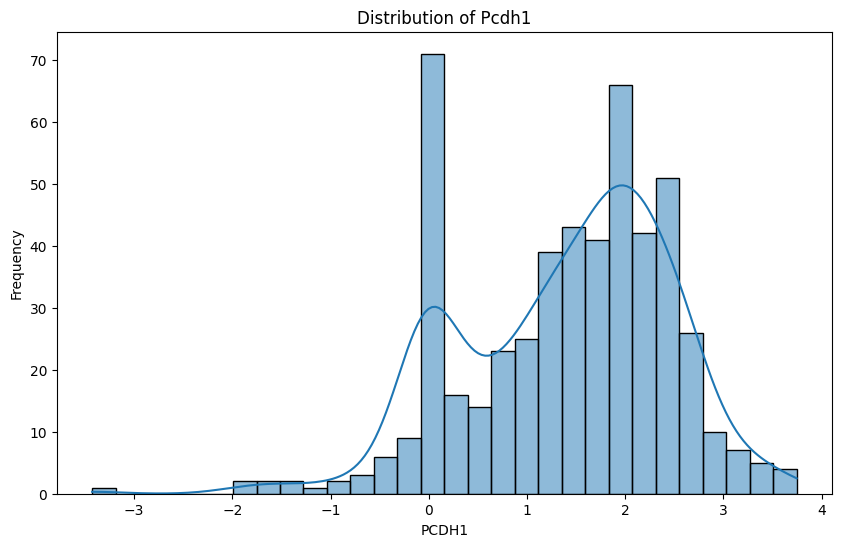

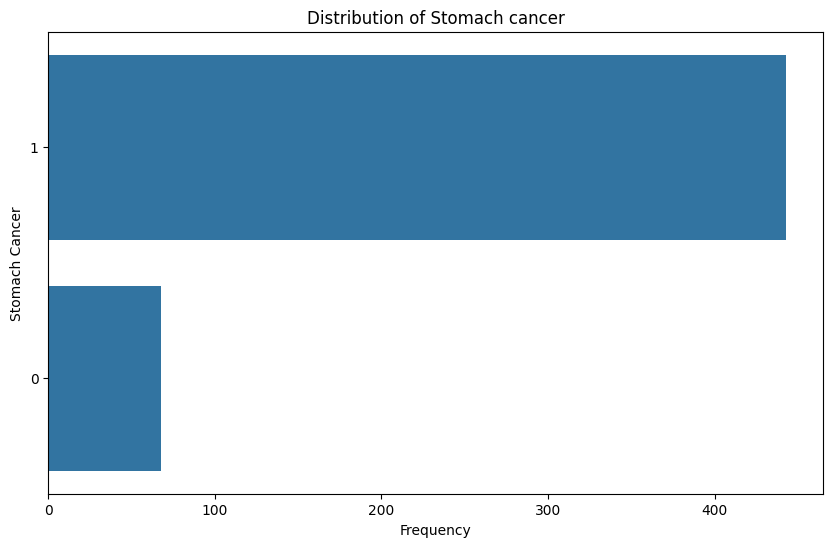

In [9]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [10]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Stomach Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512,1
TCGA-3M-AB47-01,0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988,1
TCGA-B7-5816-01,51,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612,1
TCGA-B7-5818-01,62,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312,1
TCGA-B7-A5TI-01,52,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812,1


### 3. Do regression & Cross Validation

In [11]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1784/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.7446751249519415


In [12]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For cdh1:
CDH17: Coefficient = 0.006385931262643665, p-value = 0.9508955397533944
PCDH18: Coefficient = 0.004134406055504657, p-value = 0.9664154332019235
PCDH19: Coefficient = -0.004468538571099245, p-value = 0.9518475442724883
PCDH11X: Coefficient = -0.0013376034914505735, p-value = 0.9832077128193814
PCDH11Y: Coefficient = -0.00609326190042425, p-value = 0.9039892020167518
PCDH12: Coefficient = 0.016134581331880615, p-value = 0.8681079284480698
PCDH10: Coefficient = 0.0039945899540903985, p-value = 0.963848963379706
PCDH17: Coefficient = 0.026183466768959295, p-value = 0.7770517847222012
PCDH15: Coefficient = 0.0035222473054196957, p-value = 0.9548538879651474
CDH11: Coefficient = 0.03171888303890532, p-value = 0.8310851933694363
CDH10: Coefficient = -0.002046923182556847, p-value = 0.97196627449073
CDH13: Coefficient = -0.00019990323645452737, p-value = 0.9977701122053231
CDH12: Coefficient = 0.0032049702855811565, p-value = 0.9517655682389774
CDH15: Coefficien

### 4. Discussion

In [13]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between CDH1 gene and Stomach Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the CDH1 gene and Stomach Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the CDH1 gene and Stomach Cancer when considering the influence of age.




In [14]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: CDH17
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH18
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH19
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH11X
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH11Y
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH12
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH10
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH17
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: PCDH15
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: CDH11
Coefficient is positi

In [15]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: CDH17
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the CDH17 gene and Stomach Cancer when considering the influence of age.

Variable: PCDH18
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the PCDH18 gene and Stomach Cancer when considering the influence of age.

Variable: PCDH19
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the PCDH19 gene and Stomach Cancer when considering the influence of age.

Variable: PCDH11X
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the PCDH11X gene and Stomach Cancer when considering the influence of age.

Variable: PCDH11Y
Conclusion: H0 is not rejected: There is insufficient evidence to